# Problem Set 4

### Before You Start

This is a fun but challenging problem set. It will test your python skills, as well as your understanding of the material in class and in the readings. Start early and debug often! Some notes:

* Part 1 is meant to be easy, so get through it quickly.
* Part 2 (especially 2.1) will be difficult, but it is the lynchpin of this problem set so make sure to do it well and understand what you've done. If you find your gradient descent algorithm is taking more than a few minutes to complete, debug more, compare notes with others, and go to the TA sessions (especially the sections on vectorized computation and computational efficiency).
* Depending on how well you've done 2.1, parts 2.3 and 3.3 will be relatively painless or incredibly painful. 
* Do the extra credit problems last!

---

## Introduction to the assignment

As with the last assignment, you will be using the Boston Housing Prices Data Set.

In [11]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn
import random
%matplotlib inline   
import matplotlib.pyplot as plt  
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

In [12]:
# Load the Boston Housing data into a dataframe
# Target.txt contains the median house values and Data.txt contains the other 13 features
# in order ["CRIM", "ZN", "INDUS", "CHAS", "NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
data = np.loadtxt('data.txt')
target = np.loadtxt('target.txt')

---

## Part 1: Getting Oriented


### 1.1 Use existing libraries

Soon, you will write your own gradient descent algorithm, which you will then use to minimize the squared error cost function.  First, however, let's use the canned versions that come with Python, to make sure we understand what we're aiming to achieve.

Using the same Boston housing prices dataset, explore the relationship between  median housing price and the percentage of lower status of the population using a linear regression model. Do this by - 
- (a) Regressing the `MEDV` (median housing price) on `LSTAT` (Percentage of lower status of the population)
- (b) Regressing the `MEDV` (median housing price) on `LSTAT` **and** the natural log transformed value of `LSTAT`

Interpret the results of both models by comparing them in terms of coefficients, their statistical significance and the variance explained by each model.


*Hint-*
* *You can use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn and OLS model from stats package.*

In [13]:
# Your code here

df = pd.DataFrame(data)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']
df['MEDV'] = target

regr_1 = LinearRegression()
regr_1.fit(df[['LSTAT']], df['MEDV'])
r_1 = regr_1.score(df[['LSTAT']], df['MEDV'])

print('First regression')
print('Coefficient: {:.2f}'.format(regr_1.coef_[0]))
print('Intercept: {:.2f}'.format(regr_1.intercept_))
print('R square: {:.2f}'.format(r_1))

df_2 = df.copy()
df_2['LSTAT_log'] = np.log(df_2['LSTAT'])

regr_2 = LinearRegression()
regr_2.fit(df_2[['LSTAT', 'LSTAT_log']], df_2['MEDV'])
r_2 = regr_2.score(df_2[['LSTAT', 'LSTAT_log']], df_2['MEDV'])
print('\nSecond regression')
print('Coefficient of LSTAT: {:.2f}'.format(regr_2.coef_[0]))
print('Coefficient of log of LSTAT: {:.2f}'.format(regr_2.coef_[1]))
print('Intercept: {:.2f}'.format(regr_2.intercept_))
print('R square: {:.2f}'.format(r_2))

First regression
Coefficient: -0.95
Intercept: 34.93
R square: 0.54

Second regression
Coefficient of LSTAT: 0.43
Coefficient of log of LSTAT: -18.11
Intercept: 60.68
R square: 0.67


In [14]:
from statsmodels.stats.outliers_influence import summary_table
x = df['LSTAT']
y = df['MEDV']
X = sm.add_constant(x)

ols = sm.OLS(y, X).fit()
print(ols.summary())


x = df_2[['LSTAT', 'LSTAT_log']]
y = df_2['MEDV']
X = sm.add_constant(x)

ols1 = sm.OLS(y, X).fit()
print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     597.1
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           1.42e-87
Time:                        15:37:18   Log-Likelihood:                -1642.5
No. Observations:                 506   AIC:                             3289.
Df Residuals:                     504   BIC:                             3297.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.9327      0.578     60.430      0.0

The univariate linear regression implies that, on average, median housing price decreases by $9500 for each percentage point increase in the fraction of the population that is of lower status. The second model implies that there is some curvature to this relationship -- see the figure below.  In both models, the coefficients are statistically significant. The latter model explains substantially more variation in median housing price than the former model.


### 1.2 Regression lines

Create a scatterplot of `MEDV` on the x-axis and `LSTAT` on the y-axis, and add the two regression lines from 1.1. Show the linear regression line in red, and the linear+log regression line (which may have curvature) in blue.  Label these two regression lines with the corresponding regression equations (i.e. the slope and intercept of the line).

**Bonus**: Add the 95% confidence bands (i.e.  the area that has a 95% chance of containing the true regression line) to each of these lines.

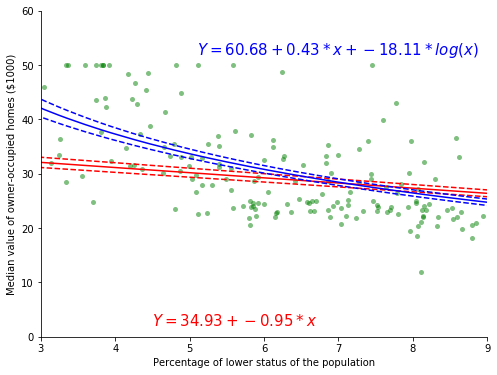

In [15]:
from statsmodels.stats.outliers_influence import summary_table
import statsmodels.api as sm
df_2 = df_2.sort_values(by='LSTAT')
x = df_2['LSTAT']
y = df_2['MEDV']
X = sm.add_constant(x)

ols = sm.OLS(y, X).fit()
st, dataa, ss2 = summary_table(ols, alpha=0.05)
fittedvalues = dataa[:,2]
predict_mean_se  = dataa[:,3]
predict_mean_ci_low, predict_mean_ci_upp = dataa[:,4:6].T
predict_ci_low, predict_ci_upp = dataa[:,6:8].T

linear_eq = 'Y = {:.2f} + {:.2f}*x'.format(regr_1.intercept_, regr_1.coef_[0])
quad_eq = 'Y = {:.2f} + {:.2f}*x + {:.2f}*log(x)'.format(regr_2.intercept_, regr_2.coef_[0], regr_2.coef_[1])

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', c='g', markersize=5, markeredgecolor='none', alpha=0.5)
ax.plot(X, fittedvalues, 'r-', label='OLS')
ax.plot(X, predict_mean_ci_low, 'r--')
ax.plot(X, predict_mean_ci_upp, 'r--')

x = df_2[['LSTAT', 'LSTAT_log']]
y = df_2['MEDV']
X = sm.add_constant(x)

ols = sm.OLS(y, X).fit()

st, dataaa, ss2 = summary_table(ols, alpha=0.05)
fittedvalues = dataaa[:,2]
predict_mean_se  = dataaa[:,3]
predict_mean_ci_low, predict_mean_ci_upp = dataaa[:,4:6].T
predict_ci_low, predict_ci_upp = dataaa[:,6:8].T

#print(type(X['RM']))
ax.plot(X['LSTAT'], fittedvalues, 'b-', label='OLS')
ax.plot(X['LSTAT'], predict_mean_ci_low, 'b--')
ax.plot(X['LSTAT'], predict_mean_ci_upp, 'b--')
plt.xlabel('Percentage of lower status of the population')
plt.ylabel('Median value of owner-occupied homes ($1000)')
ax.set_xlim(3,9)
ax.set_ylim(0,60)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.text(4.5, 2, r'$' + linear_eq + '$', fontsize=15, color='r')
ax.text(5.1, 52, r'$' + quad_eq + '$', fontsize=15, color='b')
plt.show()

### 1.3 Cross-Validation

Chances are, for the above problem you used all of your data to fit the regression line. In some circumstances this is a reasonable thing to do, but often this will result in overfitting. Let's redo the above results the ML way, using careful cross-validation.  Since you are now experts in cross-validation, and have written your own cross-validation algorithm from scratch, you can now take a shortcut and use the libraries that others have built for you.

Before you proceed with cross-validation, split your dataset into training and test sets, using a 90-10 split. You can use the [train-test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) functions from sklearn. After that, using the [cross-validation functions](http://scikit-learn.org/stable/modules/cross_validation.html) from scikit-learn, use 40-fold cross-validation to fit regression (a) from above, i.e. the linear fit of `MEDV` on `LSTAT`. Remember to use the **training set only**. We'll touch the test set only later. Each fold of cross-validation will give you one slope coefficient and one intercept coefficient.  Plot the distribution of the 40 slope coefficients using a histogram, then draw a vertical line at the value of the slope coefficient that you estimated in 1.1 using the full dataset.  What do you notice?


*NOTE - In the `train_test_split` function be sure to set a random_state of 42.*

In [16]:
from sklearn.model_selection import KFold

# your code here

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.1, random_state=42)

df_train = pd.DataFrame(X_train)
df_train.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']
df_train['MEDV'] = y_train

df_test = pd.DataFrame(X_test)
df_test.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']
df_test['MEDV'] = y_test


kf = KFold(n_splits=40)
slope = []
for train_index, test_index in kf.split(df_train):
    regr = LinearRegression()
    dff = df_train.iloc[train_index]
    regr.fit(dff[['LSTAT']], dff['MEDV'])
    slope.append(regr.coef_[0])

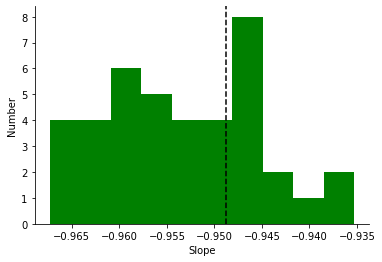

In [17]:
ax = plt.subplot(111)
ax.hist(slope,color='g')
plt.xlabel('Slope')
plt.ylabel('Number')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.axvline(regr_1.coef_[0], color='k', linestyle='--')

In [18]:
np.min(slope), np.max(slope), np.mean(slope), np.std(slope)

(-0.967325504469232,
 -0.9352900735859123,
 -0.9535173915855782,
 0.008082196302153037)

The distribution of slope coefficients estimated with k-fold cross validation range from -0.96 to -0.93, with an average value of -0.95 and standard deviation of 0.008.  Our previous estimate of the slope from 1.1 falls in the middle of this distribution

## Part 2: Gradient Descent: Linear Regression

This is where it gets fun!

*Note - For all of part 2, only use your training set that you created in 1.3*

### 2.1 Implement gradient descent with one independent variable (LSTAT)

Implement the batch gradient descent algorithm that we discussed in class. Use the version you implement to regress the housing price on the percentage of lower status of the population i.e. `MEDV`~`LSTAT`. Experiment with 3-4 different values of the learning rate *R*, and do the following for each *R*:

* Report the values of alpha and beta that minimize the loss function
* Report the number of iterations it takes for your algorithm to converge
* Report the total running time of your algorithm, in seconds

How do your coefficients compare to the ones estimated through standard libraries? Does this depend on *R*?

Some skeleton code is provided below, but you should feel free to delete this code and start from scratch if you prefer.


*HINTS-*
* Don't forget to implement a stopping condition, so that at every iteration you check whether your results have converged. Common approaches to this are to - 
    * (a) check to see if the loss has stopped decreasing,
    * (b) check if both your current parameter estimates are close to the estimates from the previous iteration.  In both cases, "close" should not be ==0, it should be <=epsilon, where epsilon is something very small (like 1e-6).
* We recommend you include a MaxIterations parameter in your gradient descent algorithm, to prevent divergence.

In [19]:
import time

"""
Function
--------
bivariate_ols
    Gradient Descent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalues, yvalues : narray
    xvalues: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta: float
    coefficient
"""
def bivariate_ols(xvalues, yvalues, R=0.01, MaxIterations=1000):
    start_time = time.time()
    alpha = 0.0
    beta = 0.0
    n = len(xvalues)
    cost = np.inf
    epsilon = 1e-6
    xvaluest = np.array(xvalues)
    yvaluest = np.array(yvalues)
    for i in range(MaxIterations):
        alpha_old = alpha
        beta_old = beta
        cost_old = cost
        #IPython.embed()
#         idx = np.random.choice(len(xvaluesg), 30, replace  =False)
#         xvaluest=xvaluesg[idx]
#         yvaluest=yvaluesg[idx]
        #IPython.embed()
        #print(i)
        alpha -= R / n * ((alpha + beta * xvaluest - yvaluest).sum())
        beta -= R / n * (((alpha_old + beta * xvaluest - yvaluest) * xvaluest).sum())
        cost = 1.0 / (2 * n) * (((alpha + beta * xvaluest - yvaluest) ** 2).sum())
        if cost_old - cost < 0:
            print('Did not converge / Diverged')
            break
        if abs(alpha - alpha_old) < epsilon and abs(beta - beta_old) < epsilon:
            print('cost < 0.0001 stopped after iteration times: {}'.format(i))
            break
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    return alpha, beta


print("OLS  model parameters\n intercept: {:.2f}, coefficient: {:.2f}".format(regr_1.intercept_, regr_1.coef_[0]))

print('\nTest 1')
print(bivariate_ols(df_train['LSTAT'], df_train['MEDV'], 0.1, 1000000))

print('\nTest 2')
print(bivariate_ols(df_train['LSTAT'], df_train['MEDV'], 0.01, 1000000))

print('\nTest 3')
print(bivariate_ols(df_train['LSTAT'], df_train['MEDV'], 0.001, 1000000))

print('\nTest 4')
print(bivariate_ols(df_train['LSTAT'], df_train['MEDV'], 0.0001, 1000000))



OLS  model parameters
 intercept: 34.93, coefficient: -0.95

Test 1
Did not converge / Diverged
Time taken: 0.00 seconds
(-27.38434879586854, -490.0999983233098)

Test 2
Did not converge / Diverged
Time taken: 0.00 seconds
(0.13465761094241352, -0.49410142883658903)

Test 3
cost < 0.0001 stopped after iteration times: 38532
Time taken: 0.76 seconds
(35.03451684415056, -0.9532408619349316)

Test 4
cost < 0.0001 stopped after iteration times: 286862
Time taken: 8.97 seconds
(34.9960191900755, -0.950962415760394)


Gradient descent failed to converge with a learning rate of 0.1 and 0.01. However, with smaller learning rates, gradient descent converged to parameter values very similar to the coefficients computed via the OLS packages. Smaller learning rates require more iterations and thus take longer to complete.

### 2.2 Data normalization (done for you!)

Soon, you will implement a version of gradient descent that can use an arbitrary number of independent variables. Before doing this, we want to give you some code in case you want to standardize your features.

In [20]:
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

### 2.3 Implement gradient descent with an arbitrary number of independent variables

Now that you have a simple version of gradient descent working, create a version of gradient descent that can take more than one independent variable.  Assume all independent variables will be continuous.  Test your algorithm using `CRIM` and `LSTAT` as independent variables. **Standardize the variables before inputting them to the gradient descent algorithm**. 

As before,  report and interpret your estimated coefficients, the number of iterations before convergence, and the total running time of your algorithm. Experiment with 2-3 different values of R.

*Hint: Be careful to implement this efficiently, otherwise it might take a long time for your code to run. Commands like `np.dot` can be a good friend to you on this problem.*

In [21]:
"""
Function
--------
multivariate_ols
    Gradient Descent to minimize OLS. Used to find coefficients of bivariate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    co-efficient
"""

def multivariate_ols(xvalue_matrix, yvalues, R=0.01, MaxIterations=1000):
    start_time = time.time()
    xvalue_matrix = np.array(xvalue_matrix)
    yvalues = np.array(yvalues)[:, np.newaxis]
    n, variable_n = xvalue_matrix.shape # sample number, varaibels number
    alpha = 0.0
    beta_array = np.transpose(np.array([[0.0] * variable_n]))
    cost = np.inf
    epsilon = 1e-6
    for i in range(MaxIterations):
        cost_old = cost
        alpha_old = alpha
        beta_array_old = np.copy(beta_array)
        # part_1: alpha + beta*x - y
        part_1 = alpha_old + np.dot(xvalue_matrix, beta_array_old) - yvalues
        alpha -= R / n * (part_1.sum())
        beta_array -= R / n * (np.dot(xvalue_matrix.T, part_1))
        part_2 = alpha + np.dot(xvalue_matrix, beta_array) - yvalues
        cost = 1.0 / (2 * n) * ((part_2 ** 2).sum())
        if cost_old - cost < 0:
            print('not converge stopped after iteration times: {}'.format(i))
            break
        if abs(alpha-alpha_old) < epsilon and max(abs(beta_array-beta_array_old)) < epsilon:
            print('cost < 0.00001 stopped after iteration times: {}'.format(i))
            break
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    return alpha, beta_array

In [22]:
df_cp = df_train.copy()
df_norm = standardize(df_cp)
df_norm['MEDV'] = df_train['MEDV']
print('Test 1')
print(multivariate_ols(df_norm[['CRIM', 'LSTAT']], df_norm['MEDV'], 0.1, 1000000))

print('\nTest 2')
print(multivariate_ols(df_norm[['CRIM', 'LSTAT']], df_norm['MEDV'], 0.01, 1000000))

print('\nTest 3')
print(multivariate_ols(df_norm[['CRIM', 'LSTAT']], df_norm['MEDV'], 0.001, 1000000))

Test 1
cost < 0.00001 stopped after iteration times: 209
Time taken: 0.01 seconds
(22.694505488922747, array([[-0.71632478],
       [-6.51928474]]))

Test 2
cost < 0.00001 stopped after iteration times: 1726
Time taken: 0.04 seconds
(22.69450483699636, array([[-0.71648559],
       [-6.51912393]]))

Test 3
cost < 0.00001 stopped after iteration times: 13190
Time taken: 0.33 seconds
(22.694463395104854, array([[-0.71809157],
       [-6.51751791]]))


In [23]:
regr_3 = LinearRegression()
regr_3.fit(df_norm[['CRIM', 'LSTAT']], df_norm['MEDV'])
print('Intercept: {:.2f}'.format(regr_3.intercept_))
print('Coefficient of CRIM: {:.2f}'.format(regr_3.coef_[0]))
print('Coefficient of LSTAT: {:.2f}'.format(regr_3.coef_[1]))

Intercept: 22.69
Coefficient of CRIM: -0.72
Coefficient of LSTAT: -6.52


When the features are standardized, the algorithm converges quickly. However, with standardized features, it is harder to literally interpret the coefficients, as they relate to a 1-SD increase in our independent variable.

### 2.4 Compare standardized vs. non-standardized results

Repeat the analysis from 2.3, but this time do not standardize your variables - i.e., use the original training data. Use these three values of R - (0.1, 0.01, and 0.001). What do you notice about the running time and convergence properties of your algorithm?

In [24]:
print('Test 1')
print(multivariate_ols(df_train[['CRIM', 'LSTAT']], df_train['MEDV'], 0.1, int(1e6)))

print('\nTest 2')
print(multivariate_ols(df_train[['CRIM', 'LSTAT']], df_train['MEDV'], 0.01, int(1e6)))

print('\nTest 3')
print(multivariate_ols(df_train[['CRIM', 'LSTAT']], df_train['MEDV'], 0.001, int(1e6)))

Test 1
not converge stopped after iteration times: 1
Time taken: 0.00 seconds
(-29.557719540017057, array([[-230.46156989],
       [-533.71780415]]))

Test 2
not converge stopped after iteration times: 1
Time taken: 0.00 seconds
(0.11292390350092829, array([[-1.29079271],
       [-0.93027949]]))

Test 3
cost < 0.00001 stopped after iteration times: 39748
Time taken: 0.95 seconds
(34.782473821363986, array([[-0.08215959],
       [-0.90928457]]))


In [25]:
regr_4 = LinearRegression()
regr_4.fit(df_train[['CRIM', 'LSTAT']], df_train['MEDV'])
print('Intercept: {:.3f}'.format(regr_4.intercept_))
print('Coefficient of CRIM: {:.3f}'.format(regr_4.coef_[0]))
print('Coefficient of LSTAT: {:.3f}'.format(regr_4.coef_[1]))

Intercept: 34.787
Coefficient of CRIM: -0.082
Coefficient of LSTAT: -0.910


When we do not standardize our features, our algorithm does not always converge, or it takes a very long time to do so. However, for an appropriate learning rate (e.g., R=0.001), we observe convergence to the same coefficients estimated through standard statistical packages (such as sklearn). In this case, the relationship indicates that an increase in the crime rate of one unit is associated with a decrease in housing prices of \\$82, while controlling for LSTAT ; and a one-unit increase in the percentage of lower status of the population is associated with a decrease in prices of \\$910, while controlling for CRIM. Note that when controlling for CRIM, the relationship between LSTAT and MEDV is different than it was in the 1.1. 

### 2.5 Extra Credit 1 :  Implement  Mini-Batch Gradient Descent (MB-GD)
MB-GD is a Gradient Descent variant that in large data sets can converge faster and is computationally less intensive. Implement MB-GD for question 2.3 (ensure you're using standardized data). Experiment with different values for the learning rate, number of iterations and "mini-batch" size
so that you compute the estimates within a 1e-3 tolerance. Do not use a batch-size greater than 32.
MB-GD is similar to Stochastic Gradient Descent but instead of using one sample to compute the gradient we use a batch of samples at each iteration. 

In [26]:
from sklearn.utils import shuffle

"""
Function
--------
multivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    
Batch_Size : Int
    batch size of mini-batches

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    co-efficient
"""

def MBGD_multivariate_ols(xvalue_matrix, yvalues, R, MaxIterations, BATCH_SIZE):
    start_time = time.time()
    xvalue_matrix = np.array(xvalue_matrix)
    yvalues = np.array(yvalues)[:, np.newaxis]
    N, variable_n = xvalue_matrix.shape 
    alpha = 0.0
    beta_array = np.transpose(np.array([[0.0] * variable_n]))
    cost = np.inf
    epsilon = 1e-6
    cost_l = []
    for i in range(MaxIterations):
        cost_old = cost
        alpha_old = alpha
        beta_array_old = np.copy(beta_array) 
        X, y = shuffle(xvalue_matrix, yvalues)
        for offset in range(0, N, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X[offset:end], y[offset:end]
            part_1 = alpha_old + np.dot(batch_x, beta_array_old) - batch_y 
            n = BATCH_SIZE
            alpha -= R / n * (part_1.sum())
            beta_array -= R / n * (np.dot(batch_x.T, part_1))
            part_2 = alpha + np.dot(batch_x, beta_array) - batch_y 
            cost = 1.0 / (2 * n) * ((part_2 ** 2).sum())
            cost_l.append(cost)
#         if cost_old - cost < 0:
#             print('not converge stopped after iteration times: {}'.format(i))
#             break
        if abs(alpha-alpha_old) < epsilon and max(abs(beta_array-beta_array_old)) < epsilon:
            print('cost < 0.00001 stopped after iteration times: {}'.format(i))
            break
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    return alpha, beta_array

In [27]:
df_cp = df_train.copy()
df_norm = standardize(df_cp)
df_norm['MEDV'] = df_train['MEDV']

print('MBGD Test 1')
print(MBGD_multivariate_ols(df_norm[['CRIM', 'LSTAT']], df_norm['MEDV'], 0.1, int(1e5), 16))

print('MBGD Test 2')
print(MBGD_multivariate_ols(df_norm[['CRIM', 'LSTAT']], df_norm['MEDV'], 0.1, int(1e5), 32))

print('MBGD Test 3')
print(MBGD_multivariate_ols(df_norm[['CRIM', 'LSTAT']], df_norm['MEDV'], 0.01, int(1e5), 16))

print('MBGD Test 4')
print(MBGD_multivariate_ols(df_norm[['CRIM', 'LSTAT']], df_norm['MEDV'], 0.01, int(1e5), 32))

print('MBGD Test 5')
print(MBGD_multivariate_ols(df_norm[['CRIM', 'LSTAT']], df_norm['MEDV'], 0.001, int(1e5), 16))

print('MBGD Test 6')
print(MBGD_multivariate_ols(df_norm[['CRIM', 'LSTAT']], df_norm['MEDV'], 0.001, int(1e5), 32))

MBGD Test 1


C:\Users\qkava\Anaconda3\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\qkava\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in square
C:\Users\qkava\Anaconda3\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\qkava\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in subtract


Time taken: 57.14 seconds
(nan, array([[nan],
       [nan]]))
MBGD Test 2
Time taken: 32.56 seconds
(nan, array([[nan],
       [nan]]))
MBGD Test 3
cost < 0.00001 stopped after iteration times: 76
Time taken: 0.04 seconds
(22.694505494358694, array([[-0.71631338],
       [-6.51929614]]))
MBGD Test 4
cost < 0.00001 stopped after iteration times: 149
Time taken: 0.05 seconds
(22.694505492189293, array([[-0.71632013],
       [-6.51928938]]))
MBGD Test 5
cost < 0.00001 stopped after iteration times: 669
Time taken: 0.39 seconds
(22.694505403026998, array([[-0.71637019],
       [-6.51923933]]))
MBGD Test 6
cost < 0.00001 stopped after iteration times: 1256
Time taken: 0.41 seconds
(22.694505149301058, array([[-0.71643329],
       [-6.51917623]]))


### 2.6 Extra Credit 2: Logistic Regression

For extra credit, implement logistic regression using gradient descent. Create a new variable (EXPENSIVE) to indicate whether the median housing price is more than $40,000. Use your model to estimate a logistic regression of EXPENSIVE on CHAS and RM. Report your results and interpret the coefficients (i.e., explain what they imply in a sentence that your parents would understand).

In [28]:
df_norm['EXPENSIVE'] = df_norm.apply(lambda x: 1 if x['MEDV']>40 else 0, axis=1)

def multivariate_lg(xvalue_matrix, yvalues, R=0.01, MaxIterations=1000):
    start_time = time.time()
    xvalue_matrix = np.array(xvalue_matrix)
    yvalues = np.array(yvalues)[:, np.newaxis]
    n, variable_n = xvalue_matrix.shape # sample number, varaibels number
    alpha = 0.0
    beta_array = np.transpose(np.array([[0.0] * variable_n]))
    cost = np.inf
    epsilon = 0.0001
    for i in range(MaxIterations):
        cost_old = cost
        alpha_old = alpha
        beta_array_old = np.copy(beta_array)
        part_1 = 1.0 /(1 + np.exp(-(alpha_old + np.dot(xvalue_matrix, beta_array_old)))) - yvalues
        alpha -= R / n * (part_1.sum())
        beta_array -= R / n * (np.dot(np.transpose(xvalue_matrix), part_1))
        part_2 = 1.0 /(1 + np.exp(-(alpha + np.dot(xvalue_matrix, beta_array)))) - yvalues
        y_predict = 1.0 /(1 + np.exp(-(alpha + np.dot(xvalue_matrix, beta_array))))
        cost = np.sum(- yvalues * np.log(y_predict) - (1 - yvalues) * np.log(1 - y_predict))
        if cost_old - cost < 0:
            print('not converge stopped after iteration times: {}'.format(i))
            break
        if abs(alpha-alpha_old) < epsilon and max(abs(beta_array-beta_array_old)) < epsilon:
            print('cost < 0.00001 stopped after iteration times: {}'.format(i))
            break
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    return alpha, beta_array

multivariate_lg(df_norm[['CHAS','RM']], df_norm['EXPENSIVE'], 0.1, 100000)

cost < 0.00001 stopped after iteration times: 2691
Time taken: 0.18 seconds


(-4.200024497328655,
 array([[0.32822603],
        [1.95170989]]))

In [29]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(df_norm[['CHAS','RM']], df_norm['EXPENSIVE'])
print(clf.intercept_)
print(clf.coef_)

[-4.13442909]
[[0.32305322 1.87523552]]


Our logistic regression results imply that the log odds ratio of being expensive increases by 0.32 for houses near the Charles river, and by 1.95 for each additional room. In other words, the probability of being expensive is ZZZ% higher for houses near the Charles river, and AAAA% higher for each additional room.

## 3 Regularization 

### 3.1 Get prepped

Using the non-standardized train and test sets you created in 1.3, for each set create new interaction variables between each possible pair of the features. If you originally had *K* features, you should now have K+(K*(K+1))/2 features. Now standardize all of your features. For expediency, it is okay if you standardize the training and test sets separately, i.e., you do not need to use the mean and standard deviation of the training set to also standardize the test set.

In [30]:
bdfc = df_train.iloc[:,:-1].copy()

cols = list(bdfc.columns.values)
cols_n = len(cols)
for i in range(cols_n):
    for j in range(i+1):
        c_name = cols[i] + '_' + cols[j]
        bdfc[c_name] = bdfc[cols[i]] * bdfc[cols[j]]


# poly = PolynomialFeatures(interaction_only=True, include_bias=False)
# bdfcc = poly.fit_transform(bdfc)
bdf_tr=pd.DataFrame(standardize(bdfc))
bdf_tr['MEDV'] = df_train['MEDV']


#Create test set's features
bdfc1 = df_test.iloc[:,:-1].copy()

cols = list(bdfc1.columns.values)
cols_n = len(cols)
for i in range(cols_n):
    for j in range(i + 1):
        c_name = cols[i] + '_' + cols[j]
        bdfc1[c_name] = bdfc1[cols[i]] * bdfc1[cols[j]]

# poly = PolynomialFeatures(interaction_only=True, include_bias=False)
# bdfcc1 = poly.fit_transform(bdfc1)

bdf_test=pd.DataFrame(standardize(bdfc1))
bdf_test['MEDV'] = df_test['MEDV']

In [31]:
bdf_tr.shape, bdf_tr.MEDV.shape

((455, 105), (455,))

In [32]:
bdf_tr.columns.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'CRIM_CRIM', 'ZN_CRIM', 'ZN_ZN',
       'INDUS_CRIM', 'INDUS_ZN', 'INDUS_INDUS', 'CHAS_CRIM', 'CHAS_ZN',
       'CHAS_INDUS', 'CHAS_CHAS', 'NOX_CRIM', 'NOX_ZN', 'NOX_INDUS',
       'NOX_CHAS', 'NOX_NOX', 'RM_CRIM', 'RM_ZN', 'RM_INDUS', 'RM_CHAS',
       'RM_NOX', 'RM_RM', 'AGE_CRIM', 'AGE_ZN', 'AGE_INDUS', 'AGE_CHAS',
       'AGE_NOX', 'AGE_RM', 'AGE_AGE', 'DIS_CRIM', 'DIS_ZN', 'DIS_INDUS',
       'DIS_CHAS', 'DIS_NOX', 'DIS_RM', 'DIS_AGE', 'DIS_DIS', 'RAD_CRIM',
       'RAD_ZN', 'RAD_INDUS', 'RAD_CHAS', 'RAD_NOX', 'RAD_RM', 'RAD_AGE',
       'RAD_DIS', 'RAD_RAD', 'TAX_CRIM', 'TAX_ZN', 'TAX_INDUS',
       'TAX_CHAS', 'TAX_NOX', 'TAX_RM', 'TAX_AGE', 'TAX_DIS', 'TAX_RAD',
       'TAX_TAX', 'PTRATIO_CRIM', 'PTRATIO_ZN', 'PTRATIO_INDUS',
       'PTRATIO_CHAS', 'PTRATIO_NOX', 'PTRATIO_RM', 'PTRATIO_AGE',
       'PTRATIO_DIS', 'PTRATIO_RAD', 'PTRATIO_TAX', 'PTRATIO_PTRATIO',
       

In [33]:
bdf_test.shape, bdf_test.MEDV.shape

((51, 105), (51,))

### 3.2 Overfitting (sort of)
Now, using your version of multivariate regression from 2.3, let's overfit the training data. Using your training set, regress housing price on as many of those K+(K*(K+1))/2 features as you can. If you get too greedy, it's possible this will take a long time to compute, so start with 5-10 features, and if you have the time, add more features.

Keep track of the training RMSE each time you add a new feature. Plot a line graph with number of features on the x-axis and training RMSE on the y-axis. 

*NOTE-*
* *You can set the MaxIterations as 1e5*

In [34]:
def compute_rmse(predictions, yvalues):
    pre = np.asarray(predictions)
    y = np.asarray(yvalues)
    rmse = np.sqrt(np.sum((pre-y) ** 2) / float(len(y)))
    return rmse

In [35]:
lst=[]
for j in range(2, 20):
    features=[each for each in bdf_tr.columns[:j]]
    x_tr=bdf_tr[features]
    x_test=bdf_test[features]     
    alpha, beta_array = multivariate_ols(x_tr, bdf_tr.MEDV, 0.01, int(1e6))
    predict = np.zeros(shape=(len(bdf_tr.MEDV)))
    predict= np.dot(x_tr,beta_array.squeeze(axis=1))
    predict += alpha
    rmse_tr = compute_rmse(np.array(predict), bdf_tr.MEDV)
    
    
    predict_test = np.zeros(shape=(len(bdf_test.MEDV)))
    predict_test= np.dot(x_test,beta_array.squeeze(axis=1))
    predict_test += alpha
    rmse_test = compute_rmse(np.array(predict_test), bdf_test.MEDV)
    
    
    
    dc={}
    dc['NumberFeatures']=j
    dc['RMSE_Training']=rmse_tr
    dc['RMSE_Testing']=rmse_test
    lst.append(dc)

cost < 0.00001 stopped after iteration times: 1228
Time taken: 0.03 seconds
cost < 0.00001 stopped after iteration times: 1952
Time taken: 0.05 seconds
cost < 0.00001 stopped after iteration times: 2035
Time taken: 0.05 seconds
cost < 0.00001 stopped after iteration times: 2424
Time taken: 0.07 seconds
cost < 0.00001 stopped after iteration times: 2280
Time taken: 0.07 seconds
cost < 0.00001 stopped after iteration times: 2539
Time taken: 0.07 seconds
cost < 0.00001 stopped after iteration times: 4380
Time taken: 0.13 seconds
cost < 0.00001 stopped after iteration times: 4399
Time taken: 0.14 seconds
cost < 0.00001 stopped after iteration times: 10914
Time taken: 0.36 seconds
cost < 0.00001 stopped after iteration times: 10962
Time taken: 0.38 seconds
cost < 0.00001 stopped after iteration times: 11081
Time taken: 0.37 seconds
cost < 0.00001 stopped after iteration times: 11297
Time taken: 0.40 seconds
cost < 0.00001 stopped after iteration times: 14459
Time taken: 0.52 seconds
cost < 

In [36]:
pd.DataFrame(lst)

,NumberFeatures,RMSE_Training,RMSE_Testing
0,2,8.265741,5.652394
1,3,7.912296,5.909360
2,4,7.689532,5.988461
3,5,7.688834,5.984038
4,6,6.142582,4.403738
5,7,6.127639,4.347528
6,8,5.862309,4.508963
7,9,5.844632,4.494985
8,10,5.780320,4.415250
9,11,5.626921,3.942250


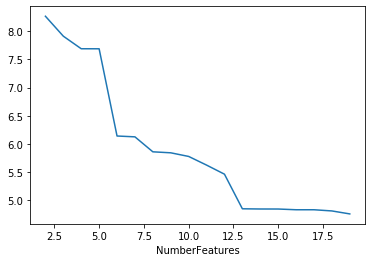

In [37]:
df_42=pd.DataFrame(lst).set_index('NumberFeatures')
# df_42['RMSE_Training'].plot(figsize=(8,6))
# plt.show()
# df_42['RMSE_Testing'].plot(figsize=(8,6))
df_42['RMSE_Training'].plot()

As we increase the number of features, our RMSE drops in the training set. This is expected behaviour and is a sign of potential overfitting!

### 3.3 Ridge regularization
Incorporate L2 (Ridge) regularization into your `multivariate_ols` regression. Write a new version of your gradient descent algorithm that includes a regularization term "lambda" to penalize excessive complexity. 

Use your regularized regression to re-fit the model using all features from the training data. Try this for several different values of lambda, and report your RMSE for each lambda separately for your training set. How do these numbers compare to each other, to the RMSE from 3.2?

Go brag to your friends about how you just implemented ridge-regularized multivariate regression using gradient descent optimization, from scratch. If you still have friends.

In [38]:
# incorporate alpha in the beta
# adding a new column with same value one into the X

def multivariate_regularized_ols(xvalue_matrix, y, R=0.01, MaxIterations=1000, lbd=1):
    # initialize the parameters
    yvalues = np.array(y)
    start_time = time.time()
    n = xvalue_matrix.shape[0]                                      #number of (training) data points
    features = xvalue_matrix.shape[1]                               #number of features
    iterr = 0
    epsilon = 1e-6       
    beta_array = np.random.random(features) 
    cost= np.inf
    #beta_array = np.zeros((features))
    alpha = 0.0
    convergence=False
    for i in range(MaxIterations):
        iterr += 1

        cost_old = cost
        alpha_old = alpha
        beta_array_old = beta_array
        part_1 = alpha_old + np.dot(xvalue_matrix, beta_array_old) - yvalues
        alpha -= R / n * (part_1.sum())
        beta_array -= R / n * (np.dot(xvalue_matrix.T, part_1)+np.dot(lbd,beta_array_old))
        part_2 = alpha + np.dot(xvalue_matrix, beta_array) - yvalues
        cost = 1.0 / (2 * n) * ((part_2 ** 2).sum() + (lbd*(np.sum(beta_array**2))))
        if cost_old - cost < 0:
            break
        
#         g_b=np.dot(xvalue_matrix.T,np.dot(xvalue_matrix,beta_array)-y )+np.dot(lbd,beta_array)
#         beta_array = beta_array - R/n *g_b 

        if abs(alpha-alpha_old) < epsilon and max(abs(beta_array-beta_array_old)) < epsilon:
            convergence=True
            ttaken=str(round(time.time() - start_time,2)) 
            break

    ttaken=str(round(time.time() - start_time,2)) 
    return alpha,beta_array,ttaken,iterr,convergence

In [39]:
def f(x,alpha,betas):
    return alpha + np.dot(x,betas)

In [40]:


x_train = bdf_tr.iloc[:,:-1]
x_train_tar = bdf_tr.MEDV


x_test = bdf_test.iloc[:,:-1]
x_test_tar = bdf_test.MEDV

R = 0.01
lbd = 0.001
alpha,beta, timetaken, iterations, convergence = multivariate_regularized_ols(x_train, x_train_tar, R, 1000000,lbd)
print("lambda={}, R={}, timetaken={}, iterations={}, convergence={}".format(lbd,R,
      timetaken,iterations,convergence))
yhat_train = f(x_train,alpha,beta)
yhat_test = f(x_test,alpha,beta)
rmse_train = compute_rmse(yhat_train,x_train_tar)
rmse_test = compute_rmse(yhat_test,x_test_tar)
print("RMSE of training set: {:.2f}".format(rmse_train))
# print('Coeff:',beta)

lbd = 0.1
alpha,beta, timetaken, iterations, convergence = multivariate_regularized_ols(x_train, x_train_tar, R, 1000000,lbd)
print("lambda={}, R={}, timetaken={}, iterations={}, convergence={}".format(lbd, R,
      timetaken,iterations,convergence))
yhat_train = f(x_train,alpha,beta)
yhat_test = f(x_test,alpha,beta)
rmse_train = compute_rmse(yhat_train,x_train_tar)
rmse_test = compute_rmse(yhat_test,x_test_tar)
print("RMSE of training set: {:.2f}".format(rmse_train))
# print('Coeff:',beta)

lbd = 1
alpha,beta, timetaken, iterations, convergence = multivariate_regularized_ols(x_train, x_train_tar, R, 1000000,lbd)
print("lambda={}, R={}, timetaken={}, iterations={}, convergence={}".format(lbd,R,
      timetaken,iterations,convergence))
yhat_train = f(x_train,alpha,beta)
yhat_test = f(x_test,alpha,beta)
rmse_train = compute_rmse(yhat_train,x_train_tar)
rmse_test = compute_rmse(yhat_test,x_test_tar)
print("RMSE of training set: {:.2f}".format(rmse_train))
# print('Coeff:',beta)

lbd = 10
alpha,beta, timetaken, iterations, convergence = multivariate_regularized_ols(x_train, x_train_tar, R, 1000000,lbd)
print("lambda={}, R={}, timetaken={}, iterations={}, convergence={}".format(lbd,R,
      timetaken,iterations,convergence))
yhat_train = f(x_train,alpha,beta)
yhat_test = f(x_test,alpha,beta)
rmse_train = compute_rmse(yhat_train,x_train_tar)
rmse_test = compute_rmse(yhat_test,x_test_tar)
print("RMSE of training set: {:.2f}".format(rmse_train))
# print('Coeff:',beta)

lambda=0.001, R=0.01, timetaken=0.72, iterations=1229, convergence=True
RMSE of training set: 3.75
lambda=0.1, R=0.01, timetaken=0.72, iterations=1229, convergence=True
RMSE of training set: 3.74
lambda=1, R=0.01, timetaken=0.71, iterations=1229, convergence=True
RMSE of training set: 3.75
lambda=10, R=0.01, timetaken=0.72, iterations=1229, convergence=True
RMSE of training set: 3.82


### 3.4 Cross-validate lambda

Up to this point, you have been fitting models and performing regularization (and basic tuning of the lambda hyperparameter) without cross-validation. This could easily lead to overfitting. Fix this by using 5-fold cross-validation on your training set to repeat 3.3 in a more systematic way.

Specifically, use 5-fold cross-validation to select the optimal value of lambda, using the lambda values `[0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]`. For each value of lambda, you should run 5-fold cross-validation, and report the average cross-validated RMSE across the 5 validation folds.  Create a figure that plots the average cross-validated RMSE (y-axis) as a function of lambda (x-axis).

Finally, select the value of lambda that minimizes cross-validated RMSE, and use it to evaluate test performance (remember, this is your holdout set from 1.3!). How does the test RMSE compare to the cross-validated RMSE? How does it compare to RMSE from nearest neighbors in PS3?


*Note-*:
* Don't forget to use standardized data!
* Your plot might be prettier if you show the x-axis in log scale.

In [41]:
#lambdas = [0] + list(np.linspace(0.1, 1, num=10))+list(np.linspace(2, 10, num=9))+list(np.linspace(15, 100, num=18))
lambdas = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]
print(lambdas)

[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]


In [42]:

x_train = bdf_tr.iloc[:,:-1]
x_train_tar = bdf_tr.MEDV


x_test = bdf_test.iloc[:,:-1]
x_test_tar = bdf_test.MEDV

dict_lbd_rmse_train = {}
dict_lbd_rmse_test = {}
for lbd in lambdas:
    counter = 0.0
    rmse_train_sum = 0
    rmse_test_sum = 0
    kf = KFold(n_splits=5)
    for train_index, val_index in kf.split(x_train):
        df_trainn = x_train.iloc[train_index]
        df_val = x_train.iloc[val_index]
        df_trainn_tar = x_train_tar.iloc[train_index]
        df_val_tar = x_train_tar.iloc[val_index]
        
        R = 0.01
        alpha,beta, timetaken, iterations, convergence = multivariate_regularized_ols(df_trainn, df_trainn_tar, R, 100000,lbd)

        
#         yhat = f(df_trainn,beta)
        
#         rmse_train = compute_rmse(yhat,df_trainn_tar)
#         rmse_train_sum += rmse_train

        yhat1 = f(df_val,alpha,beta)
        rmse_test = compute_rmse(yhat1,df_val_tar)
        rmse_test_sum += rmse_test
        counter += 1.0

#     dict_lbd_rmse_train[lbd] = rmse_train_sum / counter
    dict_lbd_rmse_test[lbd] = rmse_test_sum / counter
    print("Cross Validated RMSE: {:.2f}\n".format(rmse_test_sum / counter))

Cross Validated RMSE: 3.99

Cross Validated RMSE: 4.02

Cross Validated RMSE: 4.03

Cross Validated RMSE: 3.99

Cross Validated RMSE: 4.03

Cross Validated RMSE: 4.09

Cross Validated RMSE: 4.62

Cross Validated RMSE: 5.32

Cross Validated RMSE: 7.23

Cross Validated RMSE: 88.18



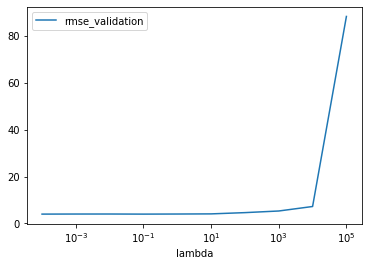

In [43]:
import matplotlib as plt

rmse_test_df=pd.DataFrame.from_dict(dict_lbd_rmse_test,orient='index').sort_index().reset_index()
rmse_test_df.columns=['lambda','rmse_validation']
rmse_test_df.set_index('lambda').plot(logx=True)

From 10e-3 to 10 we do not see much change in the RMSE (except for minor deviations), but beyond this the RMSE increases rapidly. The best lambda in this case is 0.001.

In [44]:
alpha,beta, timetaken, iterations, convergence = multivariate_regularized_ols(x_train, x_train_tar, 0.001, 100000,0.01)
yhat1 = f(x_test,alpha,beta)
rmse_test = compute_rmse(yhat1,x_test_tar)
rmse_test

3.771801993103173

###  Extra Credit 3: AdaGrad

AdaGrad is a method to implement gradient descent with different learning rates for each feature. Adaptive algorithms like this one are being extensively used especially in deep learning applications. Implement AdaGrad on 2.3 but now use CRIM, RM and DIS as independent variables. Standardize these variables before before inputting them to the gradient descent algorithm.

In [342]:
"""
Function
--------
multivariate_ols
    Gradient Decent to minimize OLS. 
    
Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    co-efficient
"""

def AdaGrad_ols(xvalue_matrix, yvalues, R=0.00001, MaxIterations=10000):
    start_time = time.time()
    xvalue_matrix = np.array(xvalue_matrix)
    yvalues = np.array(yvalues)[:, np.newaxis]
    n, variable_n = xvalue_matrix.shape # sample number, varaibels number
    # initialize parameters
    params = np.random.randn(variable_n + 1, 1)
    cost = np.inf
    epsilon = 0.00001
    G = np.zeros((variable_n + 1, variable_n + 1))
    for i in range(MaxIterations):
        g = np.zeros((variable_n + 1, 1))
        cost_old = cost
        part_1 = params[0] + np.dot(xvalue_matrix, params[1:variable_n + 1]) - yvalues
        # populate gradient vector
        g[0] = part_1.sum()
        g[1:variable_n + 1] = np.dot(xvalue_matrix.T, part_1)
        # store outer product of past values of gradients 
        G += np.outer(g, g)
        # update parameters (gd steps)
        for j in range(variable_n + 1):
            params[j] -= R / n * g[j]/np.sqrt(np.diag(G)[j])
        part_2 = params[0] + np.dot(xvalue_matrix, params[1:variable_n + 1]) - yvalues
        #print(params[2])
        cost = 1.0 / (2 * n) * ((part_2 ** 2).sum())
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    return params

In [343]:
df_cp = df_train.copy()
df_norm = standardize(df_cp)
#IPython.embed()
df_norm['MEDV'] = df_train['MEDV']
print('Test 1')
print(AdaGrad_ols(df_norm[['RM', 'CRIM', 'DIS']], df_norm['MEDV'], 100.5, 10000))


Test 1
Time taken: 1.71 seconds
[[22.56145211]
 [ 5.78244049]
 [-2.23526742]
 [ 0.22097372]]


In [344]:
regr_4 = LinearRegression()
regr_4.fit(df_norm[['RM', 'CRIM','DIS']], df_norm['MEDV'])
print('Intercept: {:.2f}'.format(regr_4.intercept_))
print('Coefficient of RM: {:.2f}'.format(regr_4.coef_[0]))
print('Coefficient of CRIM: {:.2f}'.format(regr_4.coef_[1]))
print('Coefficient of DIS: {:.2f}'.format(regr_4.coef_[2]))

Intercept: 22.69
Coefficient of RM: 5.78
Coefficient of CRIM: -2.24
Coefficient of DIS: 0.22
